Grupo 03

1.   Amanda Audy
2.   Carina Dourado
3.   Ingridy Silva
4.   Larissa Sayuri Santos
5.   Meyrele Torres
6.   Victor Farias

Esse código faz os seguintes passos:

4. Criamos variáveis para derrota, empate e vitória **acumulado** por ano e time. Essas métricas, assim como a colocação, tem como objetivo capturar o desempenho a longo prazo do time.
5. Criamos variáveis para derrota, empate e vitória **em uma janela dos últimos 05 jogos** por ano e time. Essas métricas tem como objetivo capturar o desempenho a curto prazo do time.
6. Criamos a variável resposta Demissão do tecnico. ATENÇÃO: Não temos ctz se foi demissão. Só sabemos que ocorreu a troca de técnico. Se foi por iniciativa dos dirigentes do time ou do técnico nós não sabemos.
7. Excluimos as entradas em que não há informação do técnico. Podemos pensar em como contornar isso... Mas como a var. resposta tem relação com o técnico consideramos a solução mais razoável e simples, por enquanto.
8. Criamos uma variável que representa o **histórico do técnico**. Ele corresponde ao tempo do técnico conduzindo o time. Será que o técnico estar há mais tempo no time é um indicativo a favor da sua permanência? Ou será que ele estar muito tempo é um sinal de que o time quer experimentar uma nova condução?

# DADOS DE TECNICOS COMO NA IMPUTADOS MANUALMENTE

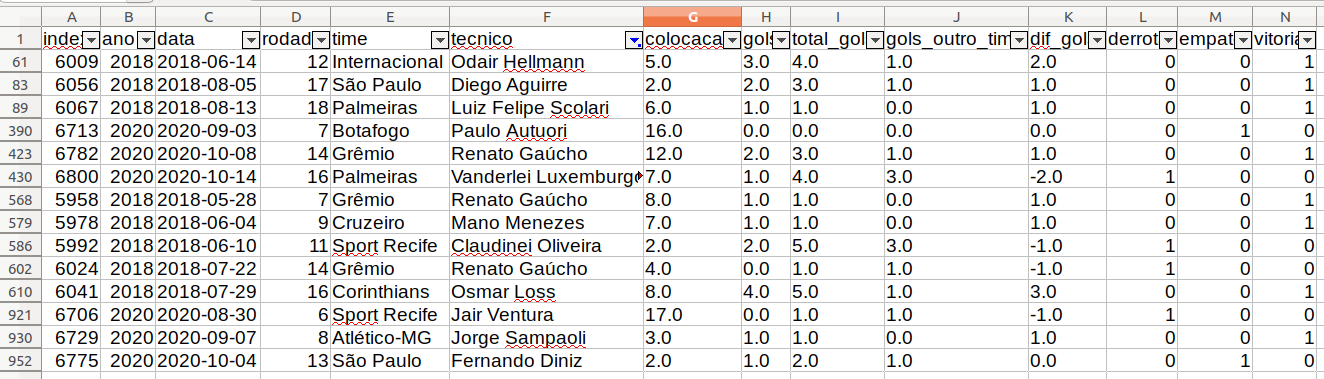

In [1]:
# Bibliotecas
import pandas as pd               # manipulação de dados
import numpy as np                # manipulação de dados

In [2]:
# Fazendo a conexao com o google drive (aula Mineracao)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lendo os dados
path = "XXX"
arq = "dados_semiprocessados_input_manual.csv"

dados = pd.read_csv(path + arq)
dados.query('index == 6056')

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria
81,6056,2018,2018-08-05,17,São Paulo,Diego Aguirre,2.0,2.0,3.0,1.0,1.0,0,0,1


# ACUMULADO DE VITORIAS, EMPATES E DERROTAS NOS ULTIMOS W JOGOS
W = 5

Vamos criar, assim, métricas para o histórico recente de cada time por ano.

In [4]:
# Quebrar os dados em sub data.frames por ANO e TIME
grouped = dados.groupby(['ano', 'time'])
# Conversao para lista
l_grouped = list(grouped)

In [5]:
# Inicializar o objeto df com a primeira entrada da lista
df = l_grouped[0][1]

# Ordenar sub data.frame
df.sort_values(by = ['ano', 'time', 'rodada'], inplace = True)

# Cada var de interesse como uma lista
der = df['derrota'].tolist()
emp = df['empate'].tolist()
vit = df['vitoria'].tolist()

# Acrescentar as variáveis que acumulam derrotas, empates e vitorias nos últimos 'w' jogos
w = 5       # tamanho da janela
df['der_acum_ult5'] = [sum(der[i-(w-1):i+1]) if i>(w-1) else sum(der[:i+1]) for i in range(len(der))]
df['emp_acum_ult5'] = [sum(emp[i-(w-1):i+1]) if i>(w-1) else sum(emp[:i+1]) for i in range(len(emp))]
df['vit_acum_ult5'] = [sum(vit[i-(w-1):i+1]) if i>(w-1) else sum(vit[:i+1]) for i in range(len(vit))]
#df

In [6]:
num_partes = len(l_grouped)
num_partes

28

In [7]:
# Fazer a mesma coisa para aas demais partes do objeto
for parte in range(1, num_partes):
  dfaux = l_grouped[parte][1]

  # Ordenar sub data.frame
  dfaux.sort_values(by = ['ano', 'time', 'rodada'], inplace = True)
  # Cada var de interesse como uma lista
  der = dfaux['derrota'].tolist()
  emp = dfaux['empate'].tolist()
  vit = dfaux['vitoria'].tolist()

  # Acrescentar as variáveis que acumulam derrotas, empates e vitorias nos últimos 'w' jogos
  w = 5       # tamanho da janela
  dfaux['der_acum_ult5'] = [sum(der[i-(w-1):i+1]) if i>(w-1) else sum(der[:i+1]) for i in range(len(der))]
  dfaux['emp_acum_ult5'] = [sum(emp[i-(w-1):i+1]) if i>(w-1) else sum(emp[:i+1]) for i in range(len(emp))]
  dfaux['vit_acum_ult5'] = [sum(vit[i-(w-1):i+1]) if i>(w-1) else sum(vit[:i+1]) for i in range(len(vit))]

  # Atualizando o objeto final
  df = pd.concat([df, dfaux], axis = 0)

  # Excluir var auxiliares para a proxima iteracao do loop
  del der
  del emp
  del vit
  del dfaux

In [8]:
# Temos o mesmo tanto de linhas?
df.shape[0]
# Sim! Graças a Deus! (e ao stackoverflow)

1064

In [9]:
# Excluir 'dados'
del dados
# Criá-lo novamente atribuindo df a dados
dados = df
# Excluir df
del df

# ACUMULADO DE VITORIAS, EMPATES E DERROTAS POR TIME E ANO

Vamos criar, assim, métricas para o *histórico* de cada time por ano.

In [10]:
# Contando o número de VITORIAS por TIME & ANO
dados['vit_acum_tot'] = dados[['ano', 'time', 'rodada', 'vitoria']].groupby(['ano', 'time'])['vitoria'].cumsum()
# Contando o número de EMPATES por TIME & ANO
dados['emp_acum_tot'] = dados[['ano', 'time', 'rodada', 'empate']].groupby(['ano', 'time'])['empate'].cumsum()
# Contando o número de DERROTAS por TIME & ANO
dados['der_acum_tot'] = dados[['ano', 'time', 'rodada', 'derrota']].groupby(['ano', 'time'])['derrota'].cumsum()

dados.query('time == "Flamengo"')

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot
533,5891,2018,2018-04-15,1,Flamengo,Maurício Barbieri,9.0,2.0,4.0,2.0,0.0,0,1,0,0,1,0,0,1,0
5,5901,2018,2018-04-22,2,Flamengo,Maurício Barbieri,9.0,2.0,2.0,0.0,2.0,0,0,1,0,1,1,1,1,0
546,5915,2018,2018-04-29,3,Flamengo,Maurício Barbieri,3.0,3.0,3.0,0.0,3.0,0,0,1,0,1,2,2,1,0
17,5926,2018,2018-05-06,4,Flamengo,Maurício Barbieri,1.0,2.0,2.0,0.0,2.0,0,0,1,0,1,3,3,1,0
555,5934,2018,2018-05-13,5,Flamengo,Maurício Barbieri,1.0,2.0,5.0,3.0,-1.0,1,0,0,1,1,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,6986,2020,2021-02-05,34,Flamengo,Rogério Ceni,2.0,2.0,2.0,0.0,2.0,0,0,1,1,0,4,19,7,8
1046,6992,2020,2021-02-07,35,Flamengo,Rogério Ceni,2.0,1.0,2.0,1.0,0.0,0,1,0,1,1,3,19,8,8
519,7003,2020,2021-02-14,36,Flamengo,Rogério Ceni,2.0,2.0,3.0,1.0,1.0,0,0,1,1,1,3,20,8,8
524,7013,2020,2021-02-21,37,Flamengo,Rogério Ceni,2.0,2.0,3.0,1.0,1.0,0,0,1,0,1,4,21,8,8


In [11]:
# Quantas entradas temos?
dados.shape[0]

1064

# FILTRANDO APENAS LINHAS COM TECNICO PREENCHIDO

In [12]:
# Remover linhas em que o técnico aparece como NaN

# Quais são as entradas que o técnico não é NA?
pos = np.where(~dados["tecnico"].isna())
# Isso é uma tupla?
pos = pos[0]
# Converte p lista
pos = pos.tolist()

# Usa o objeto 'pos' para indexar
dados_sem_tec_nan = dados.loc[pos, :]
#dados_sem_tec_nan = dados.iloc[pos, :]
len(dados_sem_tec_nan)

# Sob escrever 'dados'
dados = dados_sem_tec_nan

dados.shape[0]

1064

In [13]:
# Ordenando as linhas
dados.sort_values(by = ['time', 'ano', 'rodada'], inplace = True)
dados = dados.reindex()

# Contando o número de técnicos por time
unique_count = dados[['time', 'tecnico']].drop_duplicates().groupby('time').cumcount() + 1
unique_count = unique_count.to_frame()
unique_count = unique_count.ffill()

In [14]:
# Atribuindo essa contagem à var. id_tecnico
dados["id_tecnico"] = unique_count
dados["id_tecnico"] = dados["id_tecnico"].ffill()
dados[dados["time"] == "Cruzeiro"].head(50) 

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico
0,5890,2018,2018-04-14,1,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0,1,0,0,1,0,0,0,0,1,1.0
538,5905,2018,2018-04-22,2,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0,1,0,0,2,0,0,0,0,2,1.0
547,5917,2018,2018-04-30,3,Cruzeiro,Mano Menezes,19.0,0.0,0.0,0.0,0.0,0,1,0,2,1,0,0,1,2,1.0
16,5923,2018,2018-05-06,4,Cruzeiro,Mano Menezes,18.0,1.0,1.0,0.0,1.0,0,0,1,2,1,1,1,1,2,1.0
21,5931,2018,2018-05-13,5,Cruzeiro,Mano Menezes,14.0,2.0,2.0,0.0,2.0,0,0,1,2,1,2,2,1,2,1.0
558,5940,2018,2018-05-19,6,Cruzeiro,Mano Menezes,8.0,0.0,1.0,1.0,-1.0,1,0,0,2,1,2,2,1,3,1.0
564,5956,2018,2018-05-27,7,Cruzeiro,Mano Menezes,13.0,1.0,1.0,0.0,1.0,0,0,1,1,1,3,3,1,3,1.0
36,5965,2018,2018-05-31,8,Cruzeiro,Mano Menezes,10.0,1.0,1.0,0.0,1.0,0,0,1,1,0,4,4,1,3,1.0
577,5978,2018,2018-06-04,9,Cruzeiro,Mano Menezes,7.0,1.0,1.0,0.0,1.0,0,0,1,1,0,4,5,1,3,1.0
48,5985,2018,2018-06-07,10,Cruzeiro,Mano Menezes,2.0,1.0,2.0,1.0,0.0,0,1,0,1,1,3,5,2,3,1.0


# CRIANDO VARIAVEL DEMISSAO (TROCA DE TECNICO)

Var resposta do nosso modelo

In [15]:
# Variável auxiliar para ajudar a descobrir se rolou demissao do tecnico entre um jogo e outro
dados.sort_values(by = ['ano', 'time', 'rodada'], inplace = True)
dados['id_tecnico_lagged'] = dados.groupby(['time'])['id_tecnico'].shift(-1)

dados['demissao'] = dados['id_tecnico_lagged'] - dados['id_tecnico'] 

In [16]:
dados[dados["time"] == "Cruzeiro"].head(50) ### ----------------> Esses são nossos dados

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico,id_tecnico_lagged,demissao
0,5890,2018,2018-04-14,1,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0,1,0,0,1,0,0,0,0,1,1.0,1.0,0.0
538,5905,2018,2018-04-22,2,Cruzeiro,Mano Menezes,15.0,0.0,1.0,1.0,-1.0,1,0,0,2,0,0,0,0,2,1.0,1.0,0.0
547,5917,2018,2018-04-30,3,Cruzeiro,Mano Menezes,19.0,0.0,0.0,0.0,0.0,0,1,0,2,1,0,0,1,2,1.0,1.0,0.0
16,5923,2018,2018-05-06,4,Cruzeiro,Mano Menezes,18.0,1.0,1.0,0.0,1.0,0,0,1,2,1,1,1,1,2,1.0,1.0,0.0
21,5931,2018,2018-05-13,5,Cruzeiro,Mano Menezes,14.0,2.0,2.0,0.0,2.0,0,0,1,2,1,2,2,1,2,1.0,1.0,0.0
558,5940,2018,2018-05-19,6,Cruzeiro,Mano Menezes,8.0,0.0,1.0,1.0,-1.0,1,0,0,2,1,2,2,1,3,1.0,1.0,0.0
564,5956,2018,2018-05-27,7,Cruzeiro,Mano Menezes,13.0,1.0,1.0,0.0,1.0,0,0,1,1,1,3,3,1,3,1.0,1.0,0.0
36,5965,2018,2018-05-31,8,Cruzeiro,Mano Menezes,10.0,1.0,1.0,0.0,1.0,0,0,1,1,0,4,4,1,3,1.0,1.0,0.0
577,5978,2018,2018-06-04,9,Cruzeiro,Mano Menezes,7.0,1.0,1.0,0.0,1.0,0,0,1,1,0,4,5,1,3,1.0,1.0,0.0
48,5985,2018,2018-06-07,10,Cruzeiro,Mano Menezes,2.0,1.0,2.0,1.0,0.0,0,1,0,1,1,3,5,2,3,1.0,1.0,0.0


Como o Cruzeiro caiu em 2020 não teremos informações importantes sobre a sucessáo de técnicos que aconteceu nessa época.

# HISTÓRICO DO TÉCNICO

In [17]:
# Lendo os dados
# Info do técnico: https://interativos.globoesporte.globo.com/futebol/rotatividade-dos-tecnicos/
path = "XXX"
arq = "tab_tecnicos.csv"

tec = pd.read_csv(path + arq)
tec.drop('Saida', axis = 1, inplace = True)
tec.drop('Duracao', axis = 1, inplace = True)
tec.query('tecnico == "Tiago Nunes" ') # Corrigido

,tecnico,time,ano,Comeco,Interino
56,Tiago Nunes,Corinthians,2020,09/12/2019,0


In [18]:
# Juntando as duas info
dados = pd.merge(dados, 
            tec, 
            on = ['ano', 'time', 'tecnico'], 
            how = 'left')
dados

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico,id_tecnico_lagged,demissao,Comeco,Interino
0,5896,2018,2018-04-15,1,Atlético-MG,Thiago Larghi,13.0,1.0,3.0,2.0,-1.0,1,0,0,1,0,0,0,0,1,1.0,1.0,0.0,09/02/2018,0
1,5903,2018,2018-04-22,2,Atlético-MG,Thiago Larghi,13.0,2.0,3.0,1.0,1.0,0,0,1,1,0,1,1,0,1,1.0,1.0,0.0,09/02/2018,0
2,5911,2018,2018-04-29,3,Atlético-MG,Thiago Larghi,11.0,1.0,1.0,0.0,1.0,0,0,1,1,0,2,2,0,1,1.0,1.0,0.0,09/02/2018,0
3,5921,2018,2018-05-06,4,Atlético-MG,Thiago Larghi,4.0,2.0,4.0,2.0,0.0,0,1,0,1,1,2,2,1,1,1.0,1.0,0.0,09/02/2018,0
4,5935,2018,2018-05-13,5,Atlético-MG,Thiago Larghi,6.0,2.0,3.0,1.0,1.0,0,0,1,1,1,3,3,1,1,1.0,1.0,0.0,09/02/2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,6989,2020,2021-02-20,34,São Paulo,Vizolli,4.0,1.0,2.0,1.0,0.0,0,1,0,2,3,0,16,11,7,5.0,5.0,0.0,02/02/2021,1
1060,6996,2020,2021-02-11,35,São Paulo,Vizolli,4.0,1.0,2.0,1.0,0.0,0,1,0,2,3,0,16,12,7,5.0,5.0,0.0,02/02/2021,1
1061,7007,2020,2021-02-15,36,São Paulo,Vizolli,4.0,2.0,3.0,1.0,1.0,0,0,1,1,3,1,17,12,7,5.0,5.0,0.0,02/02/2021,1
1062,7019,2020,2021-02-23,37,São Paulo,Vizolli,3.0,0.0,1.0,1.0,-1.0,1,0,0,2,2,1,17,12,8,5.0,5.0,0.0,02/02/2021,1


In [19]:
# Converter para classe de data:
# Data do Jogo
dados.data = pd.to_datetime(dados.data, format = '%Y-%m-%d', errors = 'ignore')
# Data que o Tenico começou no time
dados.Comeco = pd.to_datetime(dados.Comeco, format = '%d/%m/%Y', errors = 'ignore')


# Criar uma nova variável: Tempo entre a chegada do tecnico e o dia do jogo
dados = dados.assign(tempo_tec = dados.data - dados.Comeco)
dados

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico,id_tecnico_lagged,demissao,Comeco,Interino,tempo_tec
0,5896,2018,2018-04-15,1,Atlético-MG,Thiago Larghi,13.0,1.0,3.0,2.0,-1.0,1,0,0,1,0,0,0,0,1,1.0,1.0,0.0,2018-02-09,0,65 days
1,5903,2018,2018-04-22,2,Atlético-MG,Thiago Larghi,13.0,2.0,3.0,1.0,1.0,0,0,1,1,0,1,1,0,1,1.0,1.0,0.0,2018-02-09,0,72 days
2,5911,2018,2018-04-29,3,Atlético-MG,Thiago Larghi,11.0,1.0,1.0,0.0,1.0,0,0,1,1,0,2,2,0,1,1.0,1.0,0.0,2018-02-09,0,79 days
3,5921,2018,2018-05-06,4,Atlético-MG,Thiago Larghi,4.0,2.0,4.0,2.0,0.0,0,1,0,1,1,2,2,1,1,1.0,1.0,0.0,2018-02-09,0,86 days
4,5935,2018,2018-05-13,5,Atlético-MG,Thiago Larghi,6.0,2.0,3.0,1.0,1.0,0,0,1,1,1,3,3,1,1,1.0,1.0,0.0,2018-02-09,0,93 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,6989,2020,2021-02-20,34,São Paulo,Vizolli,4.0,1.0,2.0,1.0,0.0,0,1,0,2,3,0,16,11,7,5.0,5.0,0.0,2021-02-02,1,18 days
1060,6996,2020,2021-02-11,35,São Paulo,Vizolli,4.0,1.0,2.0,1.0,0.0,0,1,0,2,3,0,16,12,7,5.0,5.0,0.0,2021-02-02,1,9 days
1061,7007,2020,2021-02-15,36,São Paulo,Vizolli,4.0,2.0,3.0,1.0,1.0,0,0,1,1,3,1,17,12,7,5.0,5.0,0.0,2021-02-02,1,13 days
1062,7019,2020,2021-02-23,37,São Paulo,Vizolli,3.0,0.0,1.0,1.0,-1.0,1,0,0,2,2,1,17,12,8,5.0,5.0,0.0,2021-02-02,1,21 days


In [20]:
dados[dados["time"] == "Sport Recife"].head(5) ### ----------------> Esses são nossos dados

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico,id_tecnico_lagged,demissao,Comeco,Interino,tempo_tec
304,5893,2018,2018-04-15,1,Sport Recife,Nelsinho Baptista,19.0,0.0,3.0,3.0,-3.0,1,0,0,1,0,0,0,0,1,1.0,1.0,0.0,2017-12-11,0,125 days
305,5909,2018,2018-04-24,2,Sport Recife,Nelsinho Baptista,19.0,1.0,2.0,1.0,0.0,0,1,0,1,1,0,0,1,1,1.0,2.0,1.0,2017-12-11,0,134 days
306,5912,2018,2018-04-29,3,Sport Recife,Claudinei Oliveira,17.0,2.0,3.0,1.0,1.0,0,0,1,1,1,1,1,1,1,2.0,2.0,0.0,2018-04-25,0,4 days
307,5927,2018,2018-05-07,4,Sport Recife,Claudinei Oliveira,15.0,2.0,2.0,0.0,2.0,0,0,1,1,1,2,2,1,1,2.0,2.0,0.0,2018-04-25,0,12 days
308,5931,2018,2018-05-13,5,Sport Recife,Claudinei Oliveira,8.0,0.0,2.0,2.0,-2.0,1,0,0,2,1,2,2,1,2,2.0,2.0,0.0,2018-04-25,0,18 days


# SALVANDO

In [21]:
dados.to_csv(path + 'dados_processados.csv', index = False)

#from google.colab import files
#files.download(path + 'dados_processados.csv')

In [22]:
len(dados.index)

1064